In [1]:
import pandas as pd
import numpy as np
from pckgs.headline_preprocess import HeadlinePreprocess
%load_ext autoreload
%autoreload 2
from datetime import datetime
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
# df = pd.read_csv('../datasets/223k crypto news headlines. Dataset. BDCenter Digital.csv', header=0)
# df = HeadlinePreprocess.preprocess(df)
# df.drop(['date'], inplace=True, axis=1)
# df.text = df.text.map(lambda p: p+' .')
# print(df.head())
# # np.savetxt('../datasets/headlines_clean.txt', df.values, fmt='%s')

In [ ]:
# df = pd.read_csv('../datasets/output/headline_sentiment.csv')
# df2 = pd.read_csv('../datasets/223k crypto news headlines. Dataset. BDCenter Digital.csv', header=0, usecols=[0])
# df2['publishdate'] = df2['publishdate'].map(lambda p: datetime.strptime(str(p), '%Y%m%d'))
# df2.rename(columns={'publishdate':'date'}, inplace=True)
# df.index = df2['date']
# df.head()
# # df.to_csv('../datasets/headline_sentiment.csv')


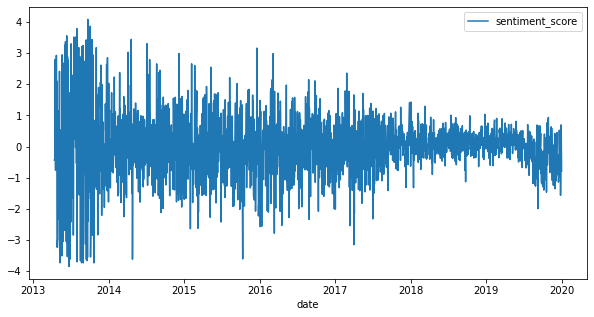

In [2]:
df = pd.read_csv('../datasets/headline_sentiment.csv', header=0, parse_dates=['date'], index_col=['date'])
###
df = df.loc[df.prediction != 'neutral']
###
df = df.resample('D').mean().ffill().bfill()
scaler = StandardScaler()
df['sentiment_score'] = scaler.fit_transform(df['sentiment_score'].values.reshape(-1, 1))
# clip
df['sentiment_score'] = df['sentiment_score'].map(lambda x: 6 if x > 6 else -6 if x < -6 else x)
# df = df.loc[(df.index >= datetime(2014, 1, 1, 00, 00, 00))]
plt.figure(figsize=(10,5))
sb.lineplot(data=df)
###
df.to_csv('../datasets/headline_sentiment_mean2.csv')
###

<AxesSubplot:xlabel='date'>

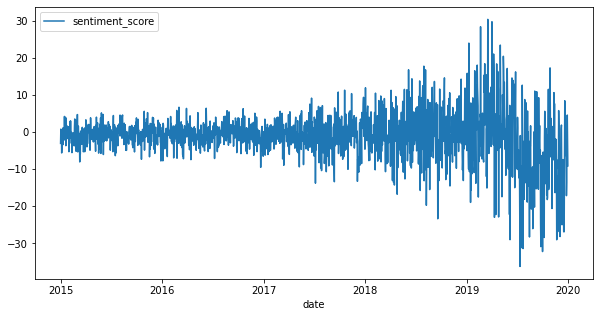

In [14]:
df = pd.read_csv('../datasets/headline_sentiment.csv', header=0, parse_dates=['date'], index_col=['date'])
df = df.loc[(df.index >= datetime(2015, 1, 1, 00, 00, 00))]
df_pos = df.loc[df.prediction == 'positive'].resample('D').sum().ffill().bfill()
df_neg = df.loc[df.prediction == 'negative'].resample('D').sum().ffill().bfill()
plt.figure(figsize=(10,5))
sb.lineplot(data=df_pos-df_neg.abs())
# sb.lineplot(x=df_pos.index, y=df_pos.sentiment_score, label='positive sums')
# plt.figure(figsize=(10,5))
# sb.lineplot(x=df_neg.index, y=df_neg.sentiment_score.abs(), label='negative sums')

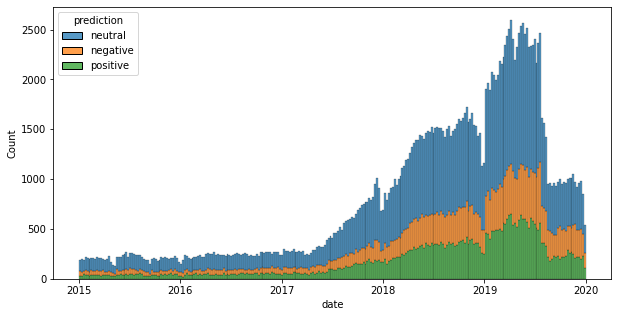

In [15]:
#see number of headlines per day
temp = pd.read_csv('../datasets/headline_sentiment.csv', header=0, parse_dates=['date'], index_col=['date'])
temp = temp.loc[(temp.index >= datetime(2015, 1, 1, 00, 00, 00))]
# temp = temp.loc[temp.prediction != 'neutral']

plt.figure(figsize=(10,5))
sb.histplot(data=temp, x=temp.index, hue='prediction', multiple='stack' ,binwidth=7)
plt.plot()
del temp

